In [1]:
!pip install wordcloud

In [2]:
from wordcloud import WordCloud
from collections import Counter #빈도분석
import matplotlib.pyplot as plt #시각화 해주는 라이브러리

In [3]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from tqdm import tqdm_notebook as tqdm

In [4]:
from bs4 import BeautifulSoup as bs
import requests as req

In [6]:
import pickle
from PIL import Image
import numpy as np

In [162]:
stopwords = ['있다','하다','되다']

def extract_noun(string):
        nouns = okt.nouns(string)
        return nouns

def extract_Adjective(string):
    Adjective = okt.pos(string)
    Adjective_list = []
    for word, tag in Adjective:
        if((tag in 'Adjective') and (word not in stopwords) ):
            Adjective_list.append(word)
    return Adjective_list

def extract_Verb(string):
    Verb = okt.pos(string, stem=True, norm=True)
    Verb_list = []
    for word, tag in Verb:
        if((tag in 'Verb') and (word not in stopwords)):
            Verb_list.append(word)  
    return Verb_list

def extract_word(string):
    noun = extract_noun(string)
    Adjective = extract_Adjective(string)
    Verb = extract_Verb(string)
    word_list = []
    for i in noun+Adjective+Verb:
        word_list.append(i) 
    return word_list

In [7]:
driver = webdriver.Chrome(ChromeDriverManager().install())

In [8]:
driver.maximize_window()

In [78]:
driver.get('https://www.16personalities.com/ko/%EC%84%B1%EA%B2%A9%EC%9C%A0%ED%98%95-infj')

WebDriverException: Message: chrome not reachable
  (Session info: chrome=105.0.5195.127)


In [41]:
mbti = pd.read_csv('mbti16가지유형_추가설명 - mbti16가지유형_추가설명.csv',encoding='utf-8')
mbti

,Unnamed: 0,제목,mbti,상세설명
0,0,전략가,INTJ-A / INTJ-T,성격유형 : “전략가”사고 능력은 인간의 위대한 점 중 하나이다. 인간은 갈대처럼 ...
1,1,논리술사,INTP-A / INTP-T,성격유형 : “논리술사”질문하는 일을 멈추지 않는 것이 중요하다. 호기심은 그 자체...
2,2,통솔자,ENTJ-A / ENTJ-T,성격유형 : “통솔자”당신의 시간은 유한하다. 그러니 다른 사람의 삶을 사느라 시간...
3,3,변론가,ENTP-A / ENTP-T,성격유형 : “변론가”변론가(ENTP)는 두뇌 회전이 빠르고 대담한 성격으로 현재 ...
4,4,옹호자,INFJ-A / INFJ-T,"성격유형 : “옹호자”사람을 대할 때는 그 사람의 잠재력을 봐야 하며, 다른 사람들..."
5,5,중재자,INFP-A / INFP-T,"소개중재자(INFP)는 언뜻 보기에 조용하고 자신을 내세우지 않는 것처럼 보이지만,..."
6,6,선도자,ENFJ-A / ENFJ-T,성격유형 : “선도자”선도자(ENFJ)는 삶에서 위대한 사명을 위해 힘써야 한다는 ...
7,7,활동가,ENFP-A / ENFP-T,성격유형 : “활동가”당신이 생계를 위해 어떤 일을 하는지는 관심이 없다. 당신이 ...
8,8,현실주의자,ISTJ-A / ISTJ-T,성격유형 : “현실주의자”자신에게 주어진 능력을 활용하지 않는 것을 두려워해야 한다...
9,9,장인,ISTP-A / ISTP-T,성격유형 : “장인”나는 다른 삶을 살고 싶었다. 매일 똑같은 곳에서 똑같은 사람을...


In [51]:
import pickle

In [52]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
c = mbti.iloc[6,3]
c

In [265]:
stopwords = ['있다.','하다','되다','고','말','며','등','것','이',"전",'않다','자신','사람','가다','있습니다',"매우","때","이러한","입니다","가가","때문","아닙니다","수","수도","있는","또한","있을","많은","있으며","다른","아니라","술사","니","감","곤","데","거나","없는","지니","위","위해","없습니다"]

In [266]:
def extract_Noun(string):
    Nouns = okt.pos(string)
    Nouns_list = []
    for word, tag in Nouns:
        if((tag in 'Noun') and (word not in stopwords) ):
            Nouns_list.append(word)
    return Nouns_list

# def extract_noun(string):
#     nouns = okt.nouns(string)
#     return nouns

def extract_Adjective(string):
    Adjective = okt.pos(string)
    Adjective_list = []
    for word, tag in Adjective:
        if((tag in 'Adjective') and (word not in stopwords) ):
            Adjective_list.append(word)
    return Adjective_list

def extract_Verb(string):
    Verb = okt.pos(string, stem=True, norm=True)
    Verb_list = []
    for word, tag in Verb:
        if((tag in 'Verb') and (word not in stopwords)):
            Verb_list.append(word)  
    return Verb_list

def extract_word(string):
    Noun = extract_Noun(string)
    Adjective = extract_Adjective(string)
    Verb = extract_Verb(string)
    word_list = []
    for i in Noun+Adjective+Verb:
        word_list.append(i) 
    return word_list

# def extract_word(string):
#     noun = extract_noun(string)
#     Adjective = extract_Adjective(string)
#     Verb = extract_Verb(string)
#     word_list = noun + Adjective + Verb
#     return word_list

In [281]:
a = mbti.iloc[0,3]
a1 = mbti.iloc[1,3]
a2 = mbti.iloc[2,3]
a3 = mbti.iloc[3,3]
a4 = mbti.iloc[4,3]
a5 = mbti.iloc[5,3]
a6 = mbti.iloc[6,3]
a7 = mbti.iloc[7,3]
a8 = mbti.iloc[8,3]
a9 = mbti.iloc[9,3]
a10 = mbti.iloc[10,3]
a11 = mbti.iloc[11,3]
a12 = mbti.iloc[12,3]
a13 = mbti.iloc[13,3]
a14 = mbti.iloc[14,3]
a15 = mbti.iloc[15,3]

In [282]:
text_data = extract_word(a)
text_data1 = extract_word(a1)
text_data2 = extract_word(a2)
text_data3 = extract_word(a3)
text_data4 = extract_word(a4)
text_data5 = extract_word(a5)
text_data6 = extract_word(a6)
text_data7 = extract_word(a7)
text_data8 = extract_word(a8)
text_data9 = extract_word(a9)
text_data10 = extract_word(a10)
text_data11 = extract_word(a11)
text_data12 = extract_word(a12)
text_data13 = extract_word(a13)
text_data14 = extract_word(a14)
text_data15 = extract_word(a15)

print(text_data)

['성격', '유형', '전략', '사고', '능력', '인간', '점', '중', '하나', '인간', '갈대', '생각', '갈대', '블', '레즈', '파스칼', '최고', '일', '희귀', '성격', '면서', '능력', '전략', '의미', '알', '전략', '성적', '서도', '두뇌', '회전', '성격', '사고', '능력', '거짓말', '위선', '능력', '이로', '생각', '주변', '모든', '분석', '성향', '이해', '어려움', '개척', '정신', '전략', '모든', '의문', '제기', '성격', '현재', '상태', '유지', '일반', '통념', '전문', '지식', '의존', '비판', '성향', '전략', '방식', '일', '진행', '더', '나은', '방식', '찾기', '규칙', '반대', '무릅쓰', '일도', '마다', '사실', '오히려', '과정', '편입', '전략', '실제', '활용', '아이디어', '가치', '생각', '아이디어', '아이디어', '이용', '성공', '쟁취', '업무', '모든', '통찰', '논리', '의지', '규칙', '설정', '비판', '제기', '방해', '가차', '모습', '전략', '독립', '성격', '기대', '기', '아이디어', '추구', '전략', '독립성', '혼자', '행동', '일', '아마', '일', '일', '일반', '의견', '결정', '편입', '혼자', '행동', '성향', '의견', '욕구', '계획', '무시', '함', '무신경', '전략', '남', '생각', '사실', '감정', '지적', '성격', '편견', '사실', '전략', '감성', '전략', '남', '상처', '슬픔', '후회', '왜', '발생', '파악', '시간', '에너지', '투자', '결정', '감정', '중시', '감정', '지식', '대한', '갈망', '전략', '몽상가', '동시', '비관', '주의자', '의지', '지적', '능력', 

In [283]:
count = Counter(text_data)
count = pd.Series(count)
count = count.sort_values(ascending=False).head(30)
count1 = Counter(text_data1)
count1 = pd.Series(count1)
count1 = count1.sort_values(ascending=False).head(30)
count2 = Counter(text_data2)
count2 = pd.Series(count2)
count2 = count2.sort_values(ascending=False).head(30)

count3 = Counter(text_data3)
count3 = pd.Series(count3)
count3 = count3.sort_values(ascending=False).head(30)
count4 = Counter(text_data4)
count4 = pd.Series(count4)
count4 = count4.sort_values(ascending=False).head(30)
count5 = Counter(text_data5)
count5 = pd.Series(count5)
count5 = count5.sort_values(ascending=False).head(30)

count6 = Counter(text_data6)
count6 = pd.Series(count6)
count6 = count.sort_values(ascending=False).head(30)
count7 = Counter(text_data7)
count7 = pd.Series(count7)
count7 = count7.sort_values(ascending=False).head(30)
count8 = Counter(text_data8)
count8 = pd.Series(count8)
count8 = count8.sort_values(ascending=False).head(30)

count9 = Counter(text_data9)
count9 = pd.Series(count9)
count9 = count9.sort_values(ascending=False).head(30)
count10 = Counter(text_data10)
count10 = pd.Series(count10)
count10 = count10.sort_values(ascending=False).head(30)
count11 = Counter(text_data11)
count11 = pd.Series(count11)
count11 = count11.sort_values(ascending=False).head(30)

count12 = Counter(text_data12)
count12 = pd.Series(count12)
count12 = count12.sort_values(ascending=False).head(30)
count13 = Counter(text_data13)
count13 = pd.Series(count13)
count13 = count13.sort_values(ascending=False).head(30)
count14 = Counter(text_data14)
count14 = pd.Series(count14)
count14 = count14.sort_values(ascending=False).head(30)

count15 = Counter(text_data15)
count15 = pd.Series(count15)
count15 = count15.sort_values(ascending=False).head(30)

In [284]:
mask_image = np.array(Image.open('C:\Study\Teamproject\\first\향수1.jfif'))

In [320]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\\batang.ttc',
                        width = 700,
                        height = 700,
                        background_color = 'white',
                        colormap = 'spring',
                        mask = mask_image,
                        random_state = 1).generate_from_frequencies(count15)
                        # count : INFJ, count1 : INFP, count2:ENFJ

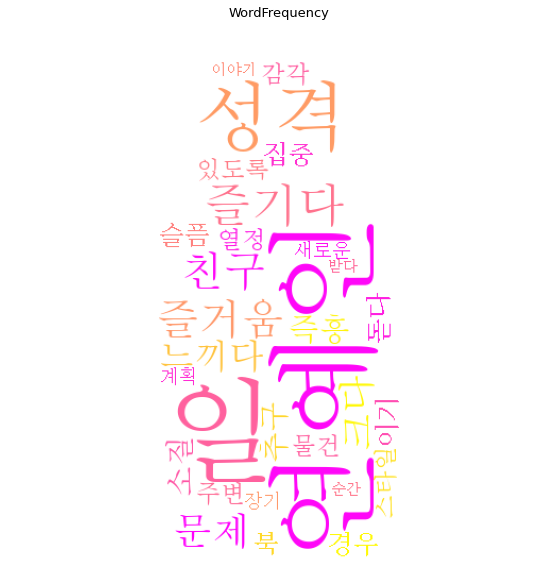

In [321]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WordFrequency", size = 13)
plt.show
plt.savefig('ESFP.png')